랜덤 포레스트

 - 랜덤한 결정 트리(Decision Tree)를 여러개 묶은 모델
 - 트리 < 데이터(부트스트램(*중복이 될 수 있음))

In [1]:
#p119
from sklearn.datasets import load_breast_cancer

In [2]:
cancer = load_breast_cancer()

In [3]:
cancer.target_names # 2진 분류 classification

array(['malignant', 'benign'], dtype='<U9')

In [4]:
#결정 트리 vs 랜덤 포레스트

In [6]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [10]:
X_train, X_test, y_train, y_test =train_test_split(
    cancer.data, cancer.target, random_state=0)

In [16]:
dt = DecisionTreeClassifier().fit(X_train,y_train)
rf = RandomForestClassifier(n_estimators=100).fit(X_train,y_train)

In [24]:
dt.score(X_test, y_test), rf.score(X_test,y_test)

(0.8881118881118881, 0.972027972027972)

In [25]:
import matplotlib.pyplot as plt

<BarContainer object of 30 artists>

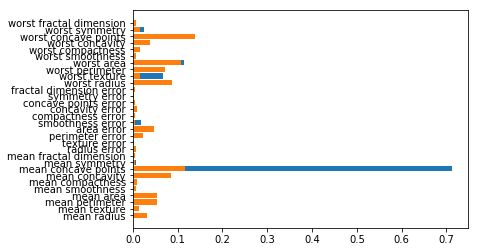

In [27]:
plt.barh(cancer.feature_names, dt.feature_importances_)
plt.barh(cancer.feature_names, rf.feature_importances_)

In [22]:
dt.feature_importances_

array([0.        , 0.0016609 , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.71160121, 0.0080277 , 0.        ,
       0.        , 0.        , 0.        , 0.03624125, 0.017502  ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.06706044, 0.        , 0.11373562, 0.        ,
       0.00975173, 0.00995974, 0.        , 0.0244594 , 0.        ])

In [23]:
rf.feature_importances_


array([0.03247776, 0.01455005, 0.05358969, 0.0545115 , 0.0080047 ,
       0.01015126, 0.08601573, 0.11675187, 0.00396221, 0.00407026,
       0.00775601, 0.00325069, 0.02177849, 0.04672685, 0.0043727 ,
       0.00455154, 0.00941864, 0.00386638, 0.00318341, 0.00552598,
       0.08783735, 0.01529908, 0.07285628, 0.10738454, 0.00688919,
       0.01490869, 0.03777077, 0.1394097 , 0.01618559, 0.00694311])

## 그라디언트 부스트 회귀 트리
 - 트리 앙상블
 - 랜덤포레스트 : 여러 나무를 서로 다른 데이터로 독립적으로 학습(병렬 가능)
 - Gradient boosting decision tree : 나무 하나씩 순차적으로 학습, 이전 나무의 오류를 최소화 하는 방향으로 학습
     - 작은 나무 1~5개
         -나무가 작다(max_depth 가 작고, leaf 가 적다) - 약한 학습기(weak learner)

In [29]:
#p122
from sklearn.ensemble import GradientBoostingClassifier

In [31]:
gbc =  GradientBoostingClassifier(random_state=0).fit(X_train, y_train)

In [34]:
gbc.score(X_train, y_train), gbc.score(X_test, y_test)
#과적합 > 트리를 작게 만들자 > 가지치기라고 한다.

(1.0, 0.958041958041958)

In [39]:
gbc = GradientBoostingClassifier(random_state=0, max_depth=1).fit(X_train, y_train)
gbc.score(X_train, y_train), gbc.score(X_test,y_test)


(0.9906103286384976, 0.972027972027972)

In [42]:
gbc = GradientBoostingClassifier(random_state=0, max_depth=2).fit(X_train, y_train)
gbc.score(X_train, y_train), gbc.score(X_test, y_test)

(1.0, 0.972027972027972)

<BarContainer object of 30 artists>

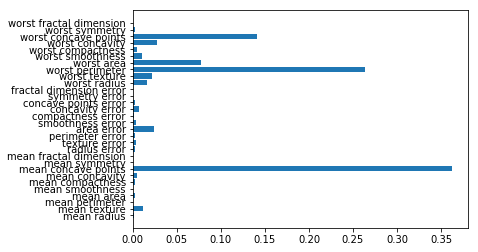

In [45]:
plt.barh(cancer.feature_names,gbc.feature_importances_)

#131 에이다부스트(AdaBoost) : Adaptive Boosting
  - 그라디언트 부스트 트리와 비슷.
  - 차이 : 이전 트리의 오차를 최소화,
           이전 트리의 오차 샘플에 가중치를 높여서 다음 트리에서 학습

In [47]:
#132
from sklearn.ensemble import AdaBoostClassifier
abc = AdaBoostClassifier(random_state=0).fit(X_train, y_train)
abc.score(X_train, y_train), abc.score(X_test, y_test)

(1.0, 0.9790209790209791)

<BarContainer object of 30 artists>

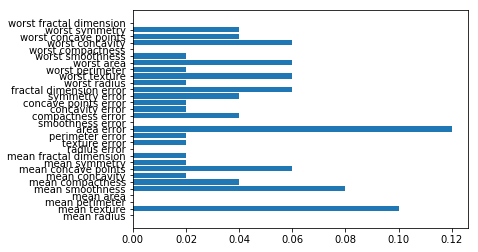

In [49]:
#특성 중요도
plt.barh(cancer.feature_names, abc.feature_importances_)

결정 트리 > 과적합 > 앙상블(랜덤 포레스트, 그라디언트 부스팅 or 에이다부스트)
최종 결정 : 분률 작업일 경우는 투표(다수결), 예측일 때는 평균

 - 134 SVM(Support vector machine)
 - 139 학습 : * 일부 데이터 포인트(샘플)가 클래스 사이의 결정 경계를 구분하는데 얼마나 중요한지를 배운다

In [52]:
#139
from sklearn.svm import SVC, SVR #SVM-C분류용, SVM-R회귀용
import mglearn

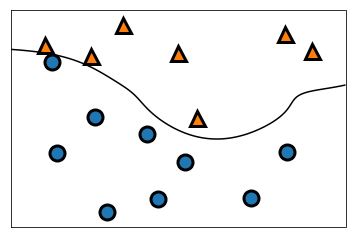

In [67]:
#140
gamma = 1 # 하나의 샘플이 미치는 영향의 범위, 작으면 넓은 범위
c = 100    # 규제 regularization : 파라미터 값이 작아지도록 규제
X, y = mglearn.tools.make_handcrafted_dataset()
svm = SVC(kernel='rbf', C=c, gamma=gamma).fit(X,y)
mglearn.plots.plot_2d_separator(svm,X,eps=.5)
sv = svm.support_vectors_
sv_labels = svm.dual_coef_.ravel() > 0
mglearn.discrete_scatter(sv[:,0], sv[:,1], sv_labels, s=15, markeredgewidth=3)


In [82]:
sv = SVC(gamma='auto').fit(X_train, y_train)
sv.score(X_train, y_train), sv.score(X_test,y_test)
# 값을 정규화하면 95%까지 상승, C를 올리면 97%

(1.0, 0.6293706293706294)

In [89]:
import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin'

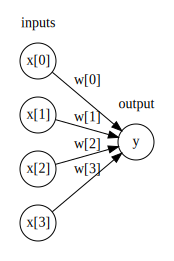

In [90]:
# 신경망(neural network) : 다층 퍼셉트론(multilayer perceptrons)
display(mglearn.plots.plot_logistic_regression_graph())

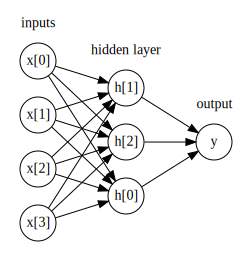

In [91]:
# 신경망(neural network) : 다층 퍼셉트론(multilayer perceptrons)
display(mglearn.plots.plot_single_hidden_layer_graph())

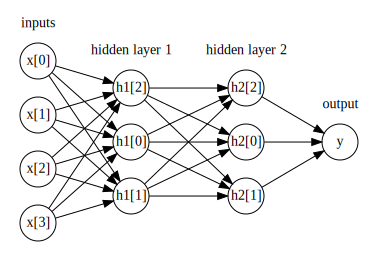

In [93]:
display(mglearn.plots.plot_two_hidden_layer_graph())
# 히든레이어가 없으면 Linear / Logistic regression
# 히든레이어가 1~3 면 신경망(MLP)
# 2000년 이후 히든레이어가 10~100~1000 많아진 모델을 딥 뉴럴 네트워크라고 합니다.

In [104]:
#151
from sklearn.neural_network import MLPClassifier,MLPClassifier
mlp = MLPClassifier().fit(X_train, y_train)
mlp.score(X_train, y_train), mlp.score(X_test,y_test) # 과소적합 : under fitting

(0.9178403755868545, 0.9230769230769231)

In [113]:
#(3,3) 히든레이어2개에 각 노드 3개씩
mlp = MLPClassifier(hidden_layer_sizes=(100,50,50,50)).fit(X_train, y_train)
mlp.score(X_train,y_train), mlp.score(X_test,y_test)
#장덤 : 모델 형태를 내 마음대로 설계, 성능 good
#단점 : 어떤 형태가 최선인가?, 학습 속도가 느리고, 분석이 까다롭다

(0.9295774647887324, 0.9300699300699301)

KNN(예측/분류), Linear Regression(예측), Logistic Regression(분류)
Decision Tree(예측/분류), Random Forest, Gradient Boost Decision Tree, AdaBoot,
SVM(SVM-C분률용/SVM-R예측용), MLP(뉴럴네트워크)